

### **Final year project**

# ***Sentiment Analysis on Consumers Reviews ***

Dataset used : IMDB and Amazon 

Sentiment classified on positive and negative. 1 for positive and 0 for Negative sentiment. dataset has been pre-processed using stemming, stop words. Feature extraction has been completed using TF-IDF vectorizer. (Picture taken from https://lens.google.com/search)

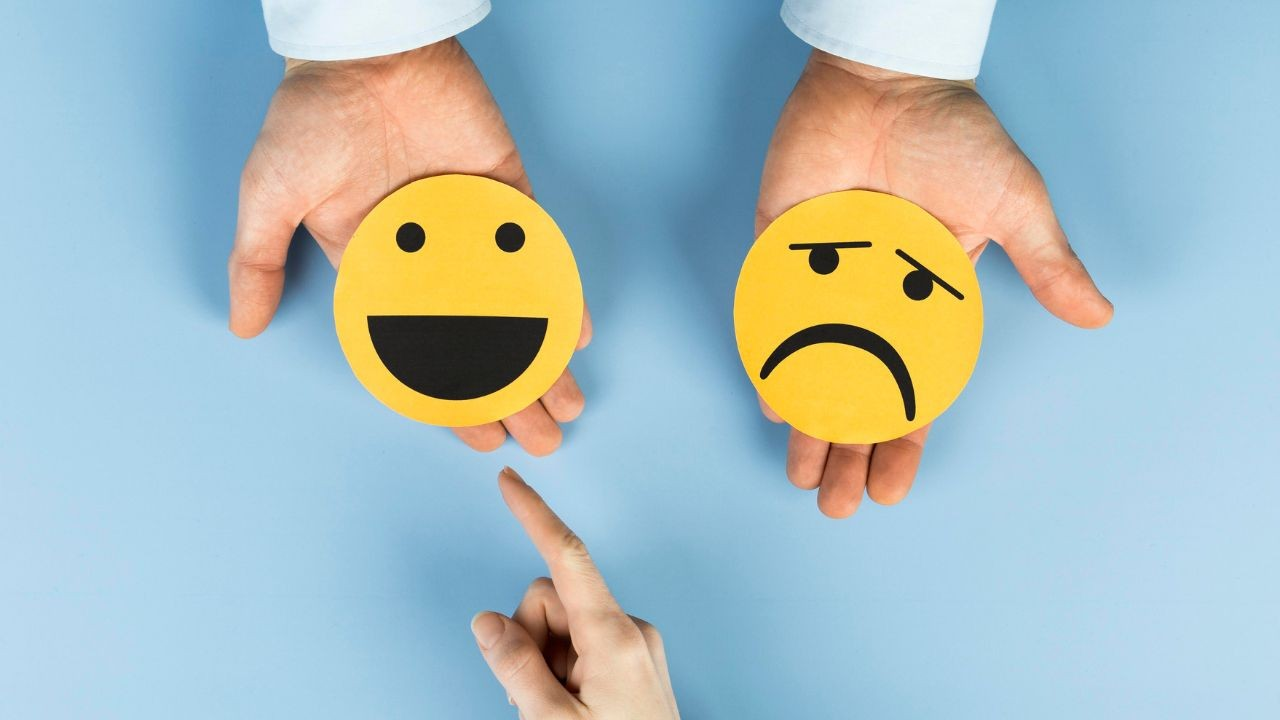


**Importing Libraries**

In [139]:
import pandas as pd
import pandas as pd
import unittest
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
from sklearn import metrics





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Importing IMDB and Amazon dataset**

In [140]:
datas = pd.read_csv('AmazonReview.csv')
datase = pd.read_csv('IMDB Dataset.csv')


## datase=IMDB dataset and datas=Amazon dataset. Visulizing datatset and information 
Both dataset information

In [141]:
datase.info()
datase.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# IMDB dataset sentiment 1 ans 0 replaced by string 'positive' and 'negative'.

IMDB dataset column 'review' and 'sentiment is being replaced by 'Review' and 'Sentiment

In [142]:

x=datase.replace({'negative':0,'positive': 1})
x.rename(columns={"review": "Review","sentiment": "Sentiment"}, inplace=True)

## Data visulaizing after Modification

In [143]:
x.head(5)

,Review,Sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [144]:
datas.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [145]:
datas.dropna(inplace=True)

Amazon dataset processing. 

Rating 1 to 3 has been provided as 0 as negative sentiment and 4 and 5 has been provided as 1 as positive sentiment

In [146]:

#1,2,3->negative review(i.e 0)
datas.loc[datas['Sentiment']<=3,'Sentiment'] = 0
 
#4,5->positive review (i.e 1)
datas.loc[datas['Sentiment']>3,'Sentiment'] = 1

Dataset visualizing after modification

In [147]:
datas.head()

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,0
1,This case takes so long to ship and it's not e...,0
2,Good for not droids. Not good for iPhones. You...,0
3,The cable was not compatible between my macboo...,0
4,The case is nice but did not have a glow light...,0


total positive and negative  sentiment in Amazon dataset

In [148]:
datas['Sentiment'].value_counts()

0    15000
1     9999
Name: Sentiment, dtype: int64

# **COMBINING IMDB AND AMAZON Dataset**

In [149]:
df= pd.concat([x.assign(ind="x"), datas.assign(ind="datas")])

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 74999 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     74999 non-null  object
 1   Sentiment  74999 non-null  int64 
 2   ind        74999 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


# Total positive negative sentiment after combining **both** dataset

In [150]:
df['Sentiment'].value_counts()

0    40000
1    34999
Name: Sentiment, dtype: int64

Combined datset visulaizing

In [151]:
df.head()

,Review,Sentiment,ind
0,One of the other reviewers has mentioned that ...,1,x
1,A wonderful little production. <br /><br />The...,1,x
2,I thought this was a wonderful way to spend ti...,1,x
3,Basically there's a family where a little boy ...,0,x
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,x


Combined dataset visulaizing

In [152]:
df=df.drop(columns=["ind"])


In [153]:
df.head()

,Review,Sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


Sentiment visulizing through Graph

-0.2 to 0.2=negative, 0.8-1.2=positive

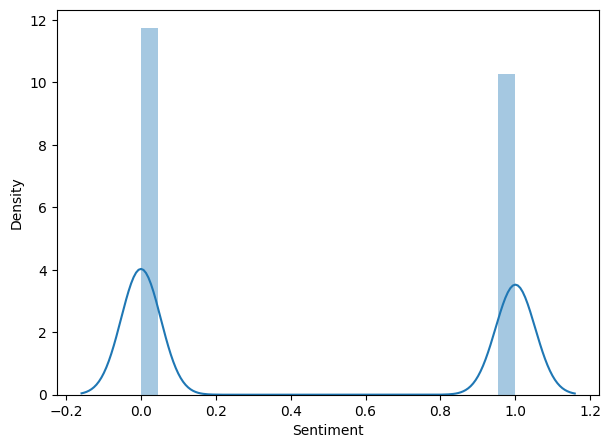

In [202]:
import seaborn as sns
fig=sns.distplot(df['Sentiment'])



In [155]:
df.loc[0, 'Review'][-50:]

0    One of the other reviewers has mentioned that ...
0    Fast shipping but this product is very cheaply...
Name: Review, dtype: object

## Natural language processing

# ignoring emoticons, puctuations,uppercase lowercase

In [156]:
import re
def data_preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [157]:
data_preprocessing("</a>This :) is :( a test :-)!")

'this is a test :) :( :)'

In [158]:
df['Review'] = df['Review'].apply(data_preprocessing)

# Stemming

removing suffix prefix from the data

In [159]:
from nltk.stem.porter import PorterStemmer

porters = PorterStemmer()

def the_tokenizer(Review):
    return Review.split()


def a_tokenizer_porter(Review):
    return [porters.stem(word) for word in Review.split()]

In [160]:
the_tokenizer('Players like playing and thus they win')#seperating from sentence

['Players', 'like', 'playing', 'and', 'thus', 'they', 'win']

In [161]:
a_tokenizer_porter('Players like playing and thus they win')#removing suffix prefix

['player', 'like', 'play', 'and', 'thu', 'they', 'win']

In [162]:
#function created for applying stemming in the dataset
def sentimentofconsumers(review):
    review=review.lower()
    review=review.replace("<br /><br />"," ")
    
  
    tokens_xy=the_tokenizer(review)
    new_tokens=[token for token in tokens_xy if token not in  stop]
    stemmed_tokens=[porters.stem(token) for token in new_tokens]
    clean_consumers_review=' '.join(stemmed_tokens)
    return clean_consumers_review

***Please wait few minutes, it takes some time to apply the function on the whole dataset***

In [163]:
df['Review'].apply(sentimentofconsumers)

0        one review mention watch 1 oz episod hook righ...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic famili littl boy jake think zombi closet...
4        petter mattei love time money visual stun film...
                               ...                        
24995    cabl lightn far superior cabl market even appl...
24996    unit perform exactli advertis use climb mounta...
24997    key cut local hardwar store cut free program u...
24998    love case order amazon color look onlin fairli...
24999    awsom love littl speaker great sound super cut...
Name: Review, Length: 74999, dtype: object

# stopword removing

In [164]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
[w for w in a_tokenizer_porter('Players like playing and thus they win')[-10:]
if w not in stop]

['player', 'like', 'play', 'thu', 'win']

In [165]:
#function created for applying stop words in the dataset
stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview
 



In [166]:
df['Review'].apply(clean_review)

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically family little boy jake thinks zombie...
4        petter mattei love time money visually stunnin...
                               ...                        
24995    cables lightning far superior cables market ev...
24996    unit performs exactly advertised use climbing ...
24997    key cut local hardware store cut free programm...
24998    love case ordered amazon color looked online f...
24999    awsome loved little speaker great sound super ...
Name: Review, Length: 74999, dtype: object

# Labeling the dataset

In [167]:
Xi = df['Review'] 
yi = df['Sentiment']

## **Feature Extraction**
# Applying Tf-IDF vectorization on the dataset

## TF-IDF Feature engineering
TF-IDF Transformer for feature extracting from the input variable. 

TF = (number of times word ‘nice’ occurred in a document) / (Total number of documents containing the word)

IDF = log [total numbers 𝑜𝑓 documents/ Total number of documents containing the word ‘nice’)]

TF-IDF = (TF) * (IDF)

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizeration = TfidfVectorizer(sublinear_tf=True, encoding='utf-8',
 decode_error='ignore')
vectorizeration.fit(Xi)
Xi=vectorizeration.transform(Xi)


# Splitting  dataset into 80% training and 20% for testing
 

In [169]:
#spliting the dataset as 80%-20%
X_data_train,X_data_test,y_data_train,y_data_test = train_test_split(Xi,yi, test_size=0.2,random_state=42)
X_data_train.shape,X_data_test.shape,y_data_train.shape,y_data_test.shape

((59999, 115234), (15000, 115234), (59999,), (15000,))

In [170]:
print("Review of consumer: ", X_data_train[1:2], "\n")
print("Sentiment: ", y_data_train[1])

Review of consumer:    (0, 112727)	0.056638313085268524
  (0, 111579)	0.09570403269594924
  (0, 110999)	0.15315264681519006
  (0, 110795)	0.16174779297450662
  (0, 108024)	0.08346619205508206
  (0, 103150)	0.043332846815152225
  (0, 102807)	0.08455061824160712
  (0, 102255)	0.046112266974414326
  (0, 102113)	0.07670133751764911
  (0, 101792)	0.06747107693578644
  (0, 101730)	0.3027130988706214
  (0, 94295)	0.07114461160056507
  (0, 90792)	0.2325613378605888
  (0, 88832)	0.1118416377047901
  (0, 78631)	0.18291915478079904
  (0, 77826)	0.20849583261954505
  (0, 72752)	0.08446411420000048
  (0, 72226)	0.046289166732926344
  (0, 71266)	0.05956909366766349
  (0, 68204)	0.0694960434435026
  (0, 62531)	0.20108418651400226
  (0, 60478)	0.10430866646635491
  (0, 60237)	0.15772604187461417
  (0, 53518)	0.07884751634449609
  (0, 51214)	0.26383702744774673
  (0, 51021)	0.25239963681080485
  (0, 48382)	0.2564783351246422
  (0, 45787)	0.08731735902258972
  (0, 39777)	0.09005838657064186
  (0, 38144)

## Implementation

Training Machine learning model


**Logistic Regression** 

In [171]:

LRmodel2 = LogisticRegression()
LRmodel2.fit(X_data_train,y_data_train)
kfold = KFold(n_splits=8, shuffle=True,random_state=22)


 # k=10, split the data into 8 equal parts
Logistic_Regression_prediction_result=cross_val_score(LRmodel2,X_data_train,y_data_train,cv=kfold,scoring='accuracy')
print('The cross validataion score for Logistic REgression is:-',round(Logistic_Regression_prediction_result.mean()*100,2))


The cross validataion score for Logistic REgression is:- 87.09


**Support vector Machine or SVM Model**

In [172]:
from sklearn.svm import LinearSVC, SVC

# Declaring the SVC with no tunning
SVM = LinearSVC()

# Fitting the data. This is where the SVM will learn
SVM.fit(X_data_train, y_data_train)

kfold = KFold(n_splits=8, shuffle=True,random_state=22)
SVM_predict_result=cross_val_score(SVM,X_data_train,y_data_train,cv=kfold,scoring='accuracy')
print('The cross validataion score for Linear SVM is:-',round(SVM_predict_result.mean()*100,2))



The cross validataion score for Linear SVM is:- 86.81


**Gaussian naive bayes Model**

In [174]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import time
guss = MultinomialNB()


guss.fit(X_data_train, y_data_train)
kfold = KFold(n_splits=8, shuffle=True,random_state=22)
guss_predict_result=cross_val_score(guss,X_data_train,y_data_train,cv=kfold,scoring='accuracy')
print('The cross validataion score for Multinomial naive Bayes is:-',round(guss_predict_result.mean()*100,2))


The cross validataion score for Multinomial naive Bayes is:- 80.03


## Final model logistic regression

According to cross validation score the final model has been chosen as Logistic regression


## Hyper-perameter tunning

In [179]:
from sklearn.model_selection import GridSearchCV
#Hyperparameter TUNNING FOR LOGISTIC REGRESSION
all_parameters = {
    "C": [0.001, 0.01, 0.1, 1.],
    "penalty": ["l1", "l2"]
}

LRmodel22 = LogisticRegression(
     random_state=21,
    class_weight="balanced",
    solver="liblinear",
    
 )

   
LRmodel22 = GridSearchCV(
    LRmodel2, 
   all_parameters,
    cv=5,
    scoring='accuracy',n_jobs= 4, verbose = 1
)

LRmodel22.fit(X_data_train, y_data_train)
# Best score
print(LRmodel22.best_score_)

#best estimator
LRmodel22.best_estimator_
LRmodel22 .best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.8697645039864433


{'C': 1.0, 'penalty': 'l2'}

## Performance on unseen test data

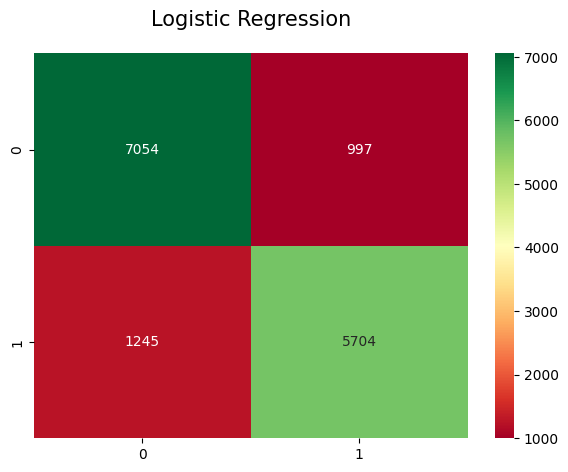

In [180]:
#without tuned model used for further implementation
K_y_pred1 = cross_val_predict(LRmodel2,X_data_test,y_data_test,cv=8)
sns.heatmap(confusion_matrix(y_data_test,K_y_pred1),annot=True,fmt='3.0f',cmap="RdYlGn")
plt.title('Logistic Regression', y=1.05, size=15)
plt.savefig(f"/content/sample_data\abc.png")

In [181]:
#classifiaction report
print('The classification report is:','\n',classification_report(y_data_test,K_y_pred1))

The classification report is: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      8051
           1       0.85      0.82      0.84      6949

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



## Testing Model Prediction

In [185]:
def predictingclass(sentence):
    sentence_features = vectorizeration.transform([sentence])
    predictiondata = LRmodel2.predict(sentence_features)[0]
    return "positive" if predictiondata == 1 else "negative"

# Test the model on a sample sentence
sente = "Not going to lie - we haven‚Äôt even opened it yet. Planning on getting it all setup tomorrow night. I did see it at the store though & it was incredible "
prediction1 = predictingclass(sente)
print(f"Sentence: {sente}")
print(f"Prediction: {prediction1}")

Sentence: Not going to lie - we haven‚Äôt even opened it yet. Planning on getting it all setup tomorrow night. I did see it at the store though & it was incredible 
Prediction: positive


In [194]:
predict=LRmodel2.predict(X_data_test)


LRmodel2.predict_proba(X_data_test[0])

array([[0.48904222, 0.51095778]])

Plotting Graph for visualizing actual and predicted data

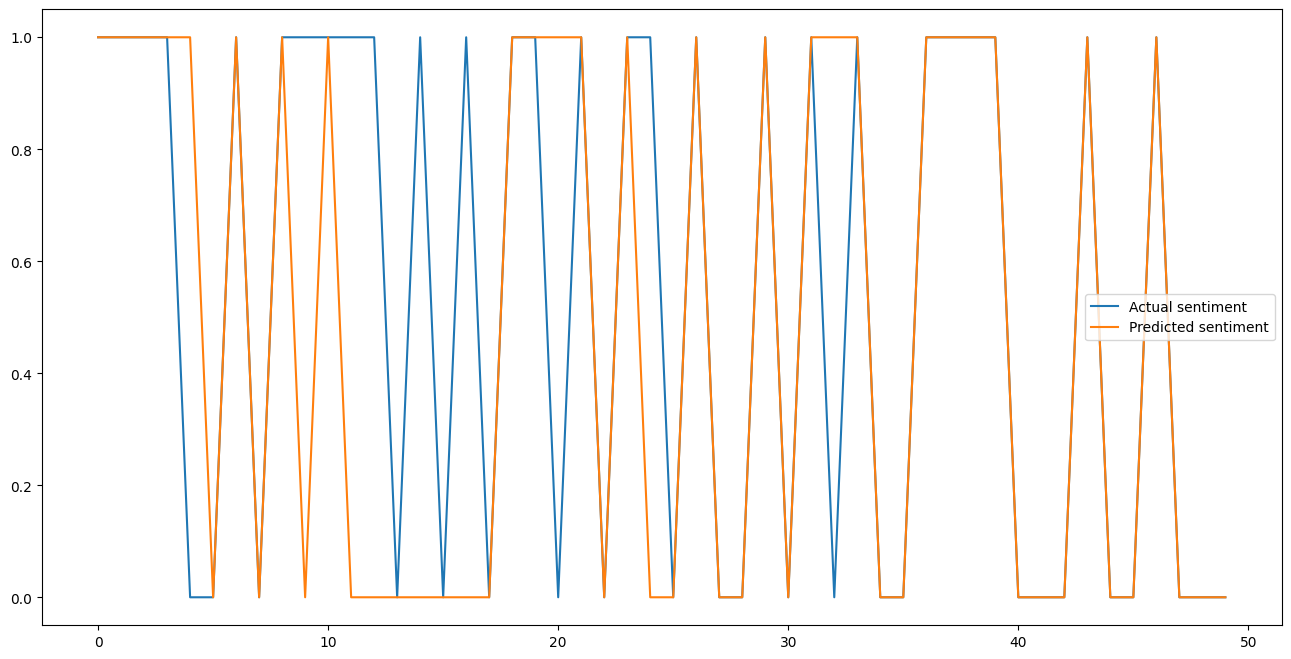

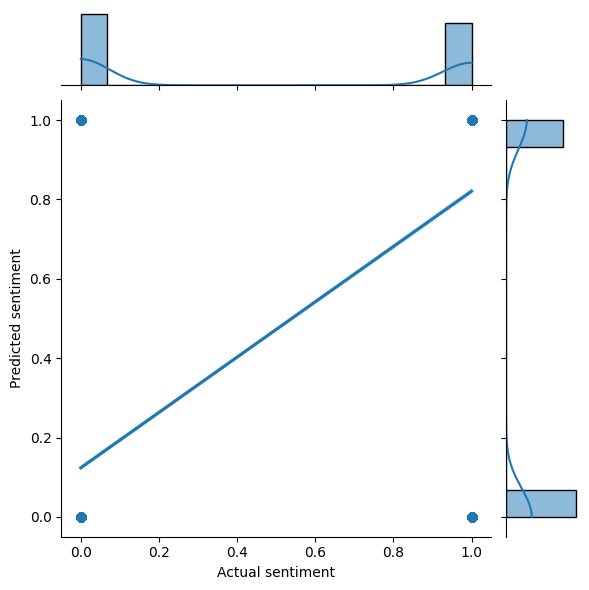

In [195]:
test = pd.DataFrame({'Predicted sentiment':K_y_pred1,'Actual sentiment':y_data_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual sentiment','Predicted sentiment'])
sns.jointplot(x='Actual sentiment',y='Predicted sentiment',data=test,kind="reg")
fig.savefig('Plot02.png')


# *Testing 

Input Data testing

In [196]:
import unittest


class TestInputData(unittest.TestCase):
    def setUp(self):
        # create an instance of the logistic regression model
        self.LRmodel = LRmodel2
        # create example training and testing data
        self.X_data_train,self.X_data_test,self.y_data_train,self.y_data_test = train_test_split(Xi,yi,test_size=0.2,random_state=42)


    def test_input_type(self):
        # correct type
        self.LRmodel.fit(self.X_data_train, self.y_data_train)
        test_result = self.LRmodel.predict(self.X_data_test)
        self.assertEqual(self.X_data_test.dtype, np.float64)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 14.039s

OK


Ouput data testing

In [197]:
import unittest


class TestInputData(unittest.TestCase):
    def setUp(self):
        # dataset check 
        self.LRmodel = LRmodel2
        # create example training and testing data
        self.X_data_train,self.X_data_test,self.y_data_train,self.y_data_test = train_test_split(Xi,yi,test_size=0.2,random_state=42)

    def test_input_shape(self):
        # correct shape
        self.LRmodel.fit( self.X_data_train, self.y_data_train)
        test_result = self.LRmodel.predict(self.X_data_test)
        self.assertEqual(test_result.shape, (len(self.y_data_test),)) # expected output shape

    

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 15.612s

OK


Testing model

In [198]:
#model testing using unit test
from sklearn.metrics import accuracy_score

class TestLRModel(unittest.TestCase):
  def setUp(self):
        self.X_data_train,self.X_data_test,self.y_data_train,self.y_data_test = train_test_split(Xi,yi,test_size=0.2,random_state=42)
        self.LRmodel = LRmodel2
  def test_accuracy(self):
        self.LRmodel.fit(self.X_data_train, self.y_data_train)
        y_pred = self.LRmodel.predict(self.X_data_test)
        acc = accuracy_score(self.y_data_test, y_pred)
        self.assertGreater(acc, 0.8)
    
   
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..
----------------------------------------------------------------------
Ran 2 tests in 16.271s

OK


# **Saving model, vectorizer, stop words**

In [199]:
import pickle
pickle.dump(LRmodel2,open('/content/sample_data/sentimentanalysis.pkl','wb'))

In [200]:
import joblib
joblib.dump(stop,'/content/sample_data\sample_data_The_stopwords (1).pkl') 
joblib.dump(LRmodel2,'/content/sample_data\sample_data_datareview_model.pkl')
joblib.dump(vectorizeration,'/content/sample_data\\sample_data_analysis_vectorizer (1).pkl')

['/content/sample_data\\sample_data_analysis_vectorizer (1).pkl']